In [18]:
from fastai.tabular.all import *
import numpy as np

In [19]:
matches_df = pd.read_csv('./datasets/20220919_out.csv')
matches_df.tail()

,Unnamed: 0,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,rank_difference,average_rank,score_difference,is_win_loss_draw,is_won,is_stake
23916,23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,...,NaN,NaN,NaN,NaN,27,166.5,1,0,True,True
23917,23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,...,NaN,NaN,NaN,NaN,57,163.5,-2,2,False,True
23918,23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,...,78.2,75.5,76.0,78.2,-32,44.0,0,1,False,True
23919,23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,...,77.5,70.8,72.3,74.0,-12,29.0,-3,2,False,True
23920,23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,...,73.8,NaN,79.3,70.8,-3,30.5,3,0,True,False


In [20]:
len(matches_df)

23921

In [21]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
display_all(matches_df.tail(10).T)

,23911,23912,23913,23914,23915,23916,23917,23918,23919,23920
Unnamed: 0,23911,23912,23913,23914,23915,23916,23917,23918,23919,23920
date,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14
home_team,Ukraine,Bosnia and Herzegovina,Romania,Luxembourg,Turkey,Moldova,Liechtenstein,Chile,Japan,Korea Republic
away_team,Republic of Ireland,Finland,Montenegro,Faroe Islands,Lithuania,Andorra,Latvia,Ghana,Tunisia,Egypt
home_team_continent,Europe,Europe,Europe,Europe,Europe,Europe,Europe,South America,Asia,Asia
away_team_continent,Europe,Europe,Europe,Europe,Europe,Europe,Europe,Africa,Africa,Africa
home_team_fifa_rank,27,59,48,94,43,180,192,28,23,29
away_team_fifa_rank,47,57,70,124,138,153,135,60,35,32
home_team_total_fifa_points,1535,1388,1446,1229,1461,932,895,1526,1553,1519
away_team_total_fifa_points,1449,1406,1342,1137,1092,1040,1105,1387,1499,1500


In [22]:
matches_df.dtypes
g = matches_df.columns.to_series().groupby(matches_df.dtypes).groups
g

{bool: ['neutral_location', 'is_won', 'is_stake'], int64: ['Unnamed: 0', 'home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'rank_difference', 'score_difference', 'is_win_loss_draw'], float64: ['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score', 'average_rank'], object: ['date', 'home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'tournament', 'city', 'country', 'shoot_out', 'home_team_result']}

In [23]:
# classification 0: won, 1: draw, 2: loss
cat_names = ["is_stake", 'home_team', 'away_team']#, 'date']
cont_names = ["average_rank", "rank_difference"]#, "score_difference"]

# 17882
dls_cat_win_loss = TabularDataLoaders.from_df(matches_df, y_names=["is_won"], bs=32, valid_idx=list(range(23921, 23921)),
    cat_names = cat_names,
    cont_names = cont_names,
    procs = [Categorify, Normalize, FillMissing])

dls_cat_win_loss_draw = TabularDataLoaders.from_df(matches_df, y_names=["is_win_loss_draw"], bs=32, valid_idx=list(range(23921, 23921)),
    cat_names = cat_names,
    cont_names = cont_names,
    procs = [Categorify, Normalize, FillMissing])

dls_cat_win_loss.train.show_batch()
dls_cat_win_loss_draw.train.show_batch()


,is_stake,home_team,away_team,average_rank,rank_difference,is_won
0,True,Poland,San Marino,114.999999,-172.000000,True
1,True,Burkina Faso,Burundi,104.500000,-59.000003,True
2,True,Faroe Islands,Northern Ireland,91.500000,92.999998,False
3,True,Norway,North Macedonia,49.500000,-13.000000,True
4,False,El Salvador,Honduras,95.000000,85.999999,False
5,True,China PR,Uzbekistan,93.500000,-29.000000,False
6,False,Spain,Uruguay,19.500000,-35.000001,False
7,False,Northern Ireland,Serbia,24.999998,10.000000,False
8,True,Cyprus,Israel,68.500000,33.000000,True
9,True,Belgium,Turkey,32.499999,-5.000000,False


,is_stake,home_team,away_team,average_rank,rank_difference,is_win_loss_draw
0,True,Thailand,Malaysia,79.000000,-57.999999,0.0
1,False,Albania,Malta,90.500000,-48.999999,0.0
2,False,Israel,Greece,43.500000,16.999999,1.0
3,True,North Macedonia,Georgia,77.500000,-23.000000,1.0
4,True,Czech Republic,Slovakia,17.999999,-8.000000,0.0
5,True,Belgium,Scotland,34.500000,-9.000000,0.0
6,False,IR Iran,Hungary,63.500000,-37.000001,2.0
7,True,Ukraine,Bosnia and Herzegovina,42.000001,-29.999999,1.0
8,False,Malawi,Botswana,130.500001,-16.999999,0.0
9,False,Scotland,New Zealand,57.500000,13.000000,1.0


In [24]:
# custom loss function
def loss(preds, targets): 
    preds = torch.round(preds)
    batch_size = preds.shape[0]
    sum_error = 0.0

    for i in range(batch_size):
        if preds[i][0] == targets[i][0] and preds[i][1] == targets[i][1]:
            sum_error += 0.0
        elif preds[i][0] == preds[i][1] and targets[i][0] == targets[i][1]:
            sum_error += 1.0
        elif preds[i][0] - preds[i][1] == targets[i][0] - targets[i][1]:
            sum_error  += 0.5
        elif preds[i][0] > preds[i][1] and targets[i][0] > targets[i][1]:
            sum_error  += 1.0
        elif preds[i][0] < preds[i][1] and targets[i][0] < targets[i][1]:
            sum_error  += 1.0
        else:
            sum_error  += 4.0

    return torch.tensor([sum_error/batch_size], dtype=torch.float, requires_grad=True)

# regression learner
# learn = tabular_learner(dls, layers=[1000,500], loss_func=loss, y_range=[-6.0, 6.0])

# classification learner
learn_win_loss = tabular_learner(dls_cat_win_loss, layers=[1000,500], metrics=accuracy, y_range=[0.0, 1.0])
learn_win_loss_draw = tabular_learner(dls_cat_win_loss_draw, layers=[1000,500], metrics=accuracy, y_range=[0.0, 2.0])

SuggestedLRs(valley=0.0003311311302240938)

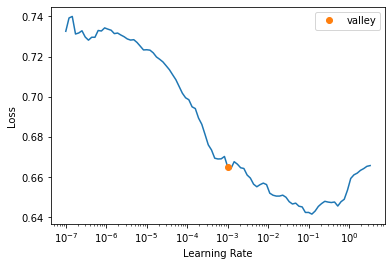

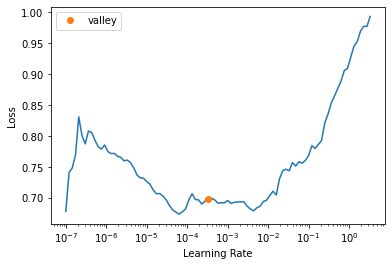

In [25]:
learn_win_loss.lr_find()
learn_win_loss_draw.lr_find()

In [26]:
learn_win_loss.fit_one_cycle(5, 10e-4, wd=0.1)
learn_win_loss_draw.fit_one_cycle(5, 10e-4, wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.609710,None,None,00:08
1,0.610960,None,None,00:07
2,0.602496,None,None,00:07
3,0.589470,None,None,00:07
4,0.573478,None,None,00:07


c:\Users\Dennis\anaconda3\envs\fastai\lib\site-packages\fastprogress\fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,accuracy,time
0,0.581283,None,None,00:07
1,0.549861,None,None,00:07
2,0.525632,None,None,00:07
3,0.528124,None,None,00:07
4,0.511774,None,None,00:07


In [27]:
learn_win_loss.show_results()
learn_win_loss_draw.show_results()

ValueError: This DataLoader does not contain any batches

In [28]:
learn_win_loss.export("./20220919_model_win_loss")
learn_win_loss_draw.export("./20220919_model_win_loss_draw")